<a href="https://colab.research.google.com/github/andalmod/Test/blob/main/Nando_regression_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.cs.ubc.ca/~nando/540-2013/lectures/gp.py

In [31]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as pl

In [32]:
from mpl_toolkits.mplot3d import Axes3D 
import pandas as pd

In [33]:

# Define the kernel
def kernel(a, b,param):
    """ GP squared exponential kernel """
    kernelParameter = param
    scale=3
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return scale*np.exp(-.5 * (1/kernelParameter) * sqdist)

In [34]:
def gp_cross(param):
  parameter=param
  N = 10         # number of training points.
  n = 50         # number of test points.
  s_1=0.001     # function noise
  s_2=0.001      #noise considered for the covariance matrix

  θ_r=np.random.normal(0,1,3) #Real parameters

  # Sample some input points and noisy versions of the function evaluated at
  # these points. 
  X = np.random.uniform(-5, 5, size=(N,2))
  unos=np.ones((N,1))
  X_=np.hstack((unos,X))
  y = X_.dot(θ_r) + s_1*np.random.randn(N)
  K = kernel(X, X,parameter)
  L = np.linalg.cholesky(K + s_2*np.eye(N))
  Xtest = np.random.uniform(-5, 5, size=(n,2))
  # compute the mean at our test points.
  Lk = np.linalg.solve(L, kernel(X, Xtest,parameter))
  mu = np.dot(Lk.T, np.linalg.solve(L, y))

  unos=np.ones((n,1))
  X_=np.hstack((unos,Xtest))
  y_real = X_.dot(θ_r)

  err=abs(mu-y_real).sum()

  return err




In [35]:
parameters=np.linspace(0.001,100,1000)

In [36]:
error=[]
for p in parameters:
  error.append(gp_cross(p))

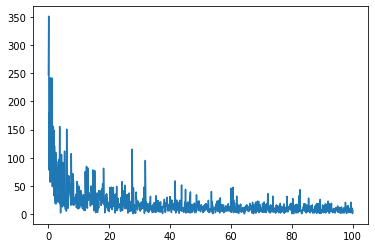

In [37]:
pl.plot(parameters,error);

In [38]:
ind=error.index(min(error))

In [39]:
par_hat=parameters[ind]
print(par_hat)

64.36472072072073


In [40]:
  parameter=par_hat
  N = 10         # number of training points.
  n = 50         # number of test points.
  s_1=0.001     # function noise
  s_2=0.001      #noise considered for the covariance matrix

  θ_r=np.random.normal(0,1,3) #Real parameters

  # Sample some input points and noisy versions of the function evaluated at
  # these points. 
  X = np.random.uniform(-5, 5, size=(N,2))
  unos=np.ones((N,1))
  X_=np.hstack((unos,X))
  y = X_.dot(θ_r) + s_1*np.random.randn(N)
  K = kernel(X, X,parameter)
  L = np.linalg.cholesky(K + s_2*np.eye(N))
  Xtest = np.random.uniform(-5, 5, size=(n,2))
  # compute the mean at our test points.
  Lk = np.linalg.solve(L, kernel(X, Xtest,parameter))
  mu = np.dot(Lk.T, np.linalg.solve(L, y))

  unos=np.ones((n,1))
  X_=np.hstack((unos,Xtest))
  y_real = X_.dot(θ_r)

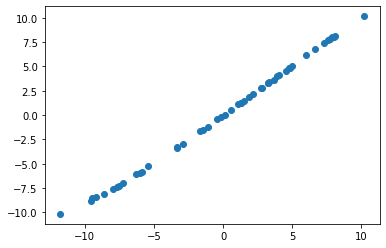

In [41]:
pl.scatter(y_real,mu);

In [42]:
df=pd.DataFrame()
df['y_hat']=mu
df['y']=y_real

In [43]:
df

,y_hat,y
0,-7.366923,-7.647501
1,-6.024047,-6.277131
2,10.165365,10.207634
3,7.380922,7.272330
4,5.066339,4.947901
5,4.492238,4.578040
6,1.893453,1.908380
7,-7.259896,-7.553102
8,2.801296,2.780094
9,2.180396,2.183103


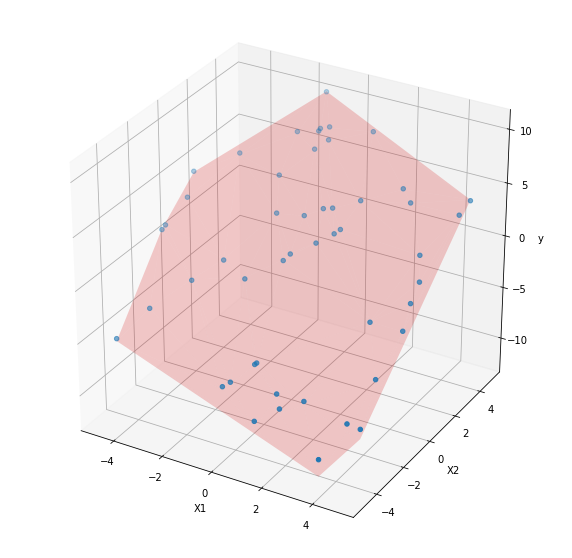

In [44]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_[:,1],X_[:,2],mu, marker='o')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.plot_trisurf(X_[:,1],X_[:,2],y_real, linewidth=0.2, antialiased=True,color='r',alpha=0.2)

plt.show()